In [1]:
#Import Python libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv('/content/Stress-Lysis.csv')

In [ ]:
df

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [5]:
X = df

In [ ]:
X

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [6]:
#PCA использует ковариационную матрицу, и если не привести признаки к одному масштабу, компоненты с большими числовыми значениями будут иметь большее влияние на результат, что может привести к искажению данных.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
#Цель PCA — найти такие новые переменные (компоненты), которые бы сохраняли как можно больше информации от исходных данных при меньшем количестве измерений.
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [8]:
X_pca

array([[ 3.56246696e-01,  2.88275923e-01, -2.62292657e-01,
         9.25198754e-17],
       [ 1.23505587e-01, -1.67275949e-01, -3.30698980e-01,
         1.77585322e-17],
       [ 2.62787943e+00,  4.44450730e-01,  2.47317703e-02,
         6.69599272e-16],
       ...,
       [ 2.14354145e+00, -4.76917410e-01, -1.04979250e-01,
         9.41687571e-16],
       [-2.34560341e+00,  5.83606074e-01, -6.18760501e-02,
        -1.70148808e-15],
       [-1.03439112e+00, -4.54743243e-01,  2.68102803e-01,
         2.68219523e-16]])

In [9]:
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names) #DataFrame с именами компонент в качестве столбцов для визуализации

In [15]:
component_names

['PC1', 'PC2', 'PC3', 'PC4']

In [13]:
X.columns

Index(['Humidity', 'Temperature', 'Step count', 'Stress Level'], dtype='object')

In [10]:
X_pca

,PC1,PC2,PC3,PC4
0,0.356247,0.288276,-0.262293,9.251988e-17
1,0.123506,-0.167276,-0.330699,1.775853e-17
2,2.627879,0.444451,0.024732,6.695993e-16
3,2.563592,0.119082,-0.088856,5.646845e-16
4,-2.437882,1.052895,0.219426,-9.201613e-16
...,...,...,...,...
1996,0.220804,-0.154543,-0.386437,-3.588412e-16
1997,-2.857932,0.456896,0.203303,-5.891451e-16
1998,2.143541,-0.476917,-0.104979,9.416876e-16
1999,-2.345603,0.583606,-0.061876,-1.701488e-15


In [11]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # Названия главных компонент становятся заголовками столбцов.
    index=X.columns,  # Humidity, Temperature, Step count, Stress Leve мои исходные
)
print("PCA Loadings:\n", loadings)

PCA Loadings:
                    PC1       PC2       PC3           PC4
Humidity      0.511474 -0.226785 -0.432392 -7.071068e-01
Temperature   0.511474 -0.226785 -0.432392  7.071068e-01
Step count    0.478742  0.871111  0.109414 -6.661338e-16
Stress Level  0.497588 -0.371891  0.783647 -2.775558e-16


In [ ]:
# 5. Identify important features for each principal component
important_features = loadings.apply(lambda x: x.abs().sort_values(ascending=False).index[:3], axis=0)
print("Top 3 important features per PC:\n", important_features)

Top 3 important features per PC:
             PC1           PC2           PC3          PC4
0      Humidity    Step count  Stress Level  Temperature
1   Temperature  Stress Level      Humidity     Humidity
2  Stress Level      Humidity   Temperature   Step count


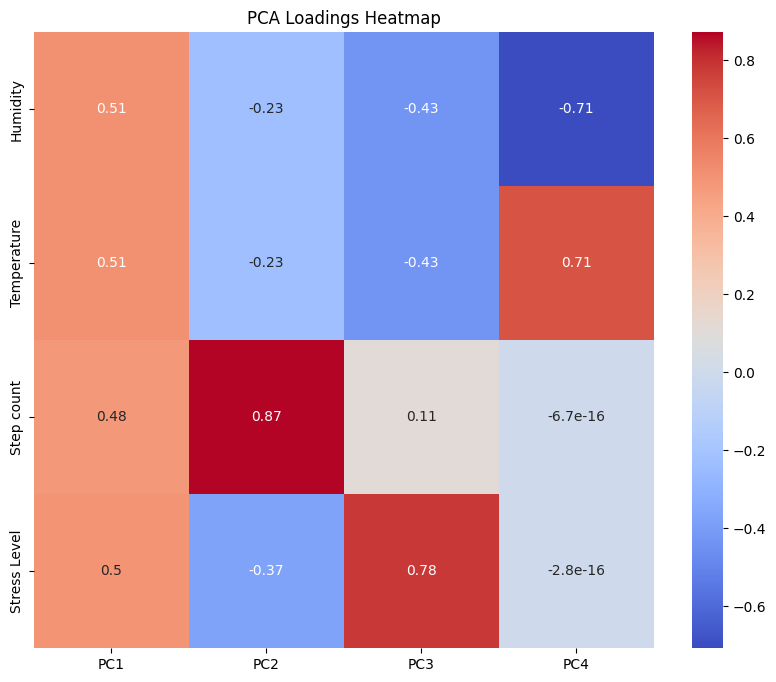

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', cbar=True)
plt.title("PCA Loadings Heatmap")
plt.show()

Понимание структуры данных: Вы можете использовать эти главные компоненты, чтобы интерпретировать, какие признаки больше всего влияют на общую изменчивость данных. Например, PC1 сильно зависит от Humidity и Temperature, тогда как PC3 связан со Stress Level.

Тепловая карта помогает интерпретировать вклад признаков в главные компоненты и понять, какие признаки лучше всего представляют исходные данные в сокращенном виде.

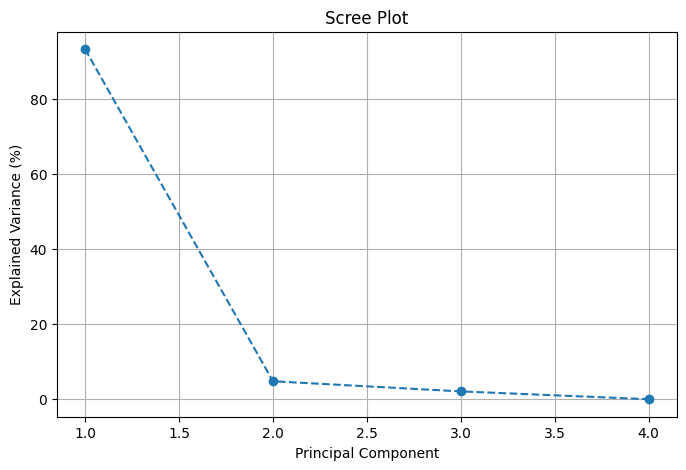

In [16]:
 #Create a Scree Plot to visualize explained variance
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.title('Scree Plot')
plt.grid()
plt.show()

Scree Plot показывает процент объясненной дисперсии для каждого главного компонента. На этом графике видно, как снижается объясненная дисперсия по мере увеличения количества компонентов.

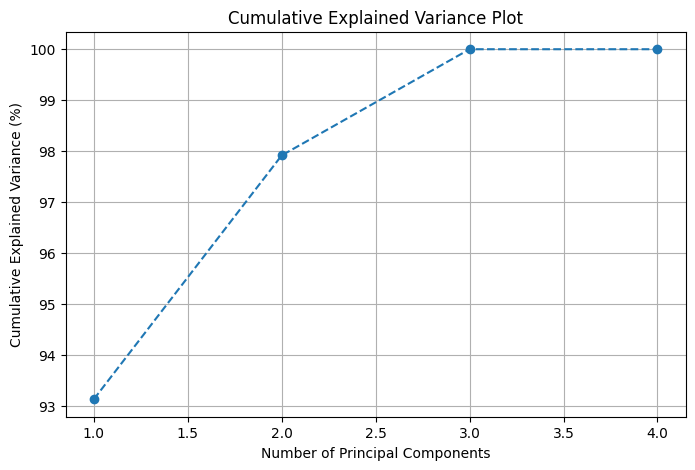

In [ ]:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

Это полезно для понимания того, сколько компонент нужно сохранить, чтобы объяснить заданный процент дисперсии (например, 95% или 99%). Чем быстрее кумулятивная кривая достигает высокого значения, тем меньшее количество компонент можно выбрать для минимальной потери информации.

In [ ]:
# Display cumulative explained variance
print("Cumulative Explained Variance:\n", cumulative_variance)
print("\nExplanation:")
print(f"The first few principal components explain {round(cumulative_variance[2], 2)}% of the total variance, "
      f"which suggests that the dimensionality can be reduced without losing much information. "
      "Important features influencing each principal component are shown above, with the heatmap visualizing the loadings.")

Cumulative Explained Variance:
 [ 93.13508119  97.91747952 100.         100.        ]

Explanation:
The first few principal components explain 100.0% of the total variance, which suggests that the dimensionality can be reduced without losing much information. Important features influencing each principal component are shown above, with the heatmap visualizing the loadings.



10. Scree Plot Interpretation
The Scree plot shows the explained variance for each component.
PC1 captures the majority of the variance (likely over 80% based on the plot), which suggests it is the most informative.
PC2 captures a much smaller amount of variance, with PC3 and PC4 contributing even less.
Based on the plot, you could likely retain only PC1 (and potentially PC2 if more detail is needed) for dimensionality reduction, as additional components add minimal new information.

In [17]:
sne_df = pd.read_csv('/content/Stress-Lysis.csv')

In [18]:
X = sne_df

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
def find_best_perplexity(X, perplexity_values, random_state=42):
    kl_divergences = {}
    best_perplexity = None
    lowest_kl = float('inf')

    for perplexity in perplexity_values:
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
        X_tsne = tsne.fit_transform(X)

        # Calculate Kullback-Leibler (KL) divergence
        kl_divergence = tsne.kl_divergence_
        kl_divergences[perplexity] = kl_divergence

        print(f"Perplexity: {perplexity}, KL Divergence: {kl_divergence}")

        # Update best perplexity if current KL divergence is lower
        if kl_divergence < lowest_kl:
            lowest_kl = kl_divergence
            best_perplexity = perplexity

    return best_perplexity, kl_divergences


In [ ]:
#perplexity — параметр, который контролирует количество ближайших соседей, используемых для моделирования.
perplexity_values = [5, 10, 20, 30, 50]
best_perplexity, kl_results = find_best_perplexity(X_scaled, perplexity_values)

print(f"Best Perplexity: {best_perplexity}")
#Алгоритм минимизирует KL Divergence между распределениями в исходном пространстве и в низкоразмерном пространстве. Это позволяет сохранить локальные отношения, обеспечивая максимальное сходство структуры данных до и после уменьшения размерности.

Perplexity: 5, KL Divergence: 0.5000197887420654
Perplexity: 10, KL Divergence: 0.3312917947769165
Perplexity: 20, KL Divergence: 0.3161084055900574
Perplexity: 30, KL Divergence: 0.35136425495147705
Perplexity: 50, KL Divergence: 0.34985190629959106
Best Perplexity: 20


In [20]:
# 3. В реальных задачах данные часто бывают многомерными (содержат десятки, сотни или даже тысячи признаков), и работа с такими данными напрямую не всегда удобна и эффективна.
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# 4. Calculate Kullback-Leibler (KL) divergence
kl_divergence = tsne.kl_divergence_
print(f"Kullback-Leibler Divergence: {kl_divergence}")

# Perplexity is already a parameter in the t-SNE, but you can estimate it based on the number of neighbors
print(f"Perplexity used: {tsne.perplexity}")

Kullback-Leibler Divergence: 0.3161084055900574
Perplexity used: 20


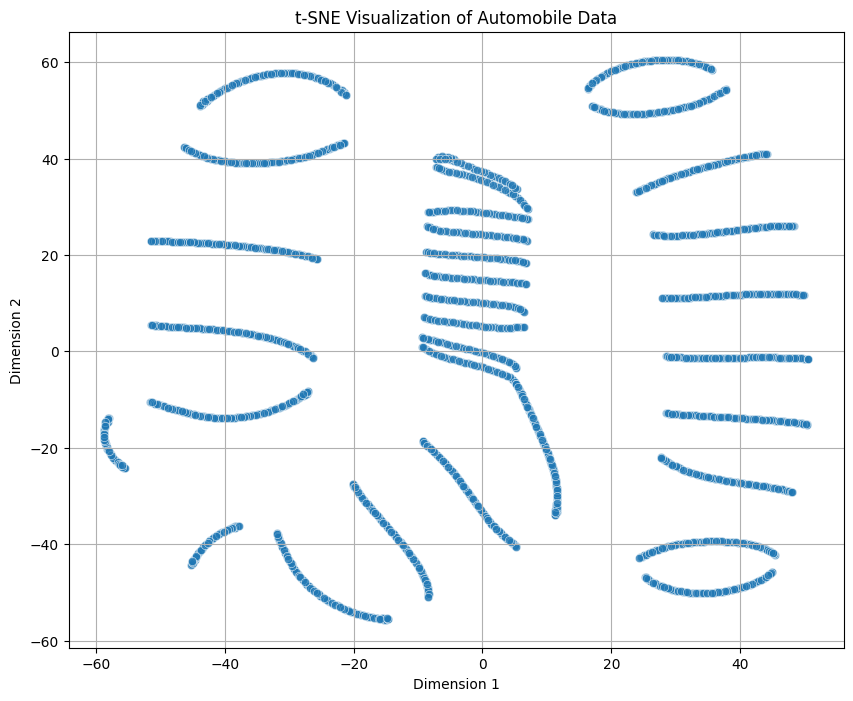

In [25]:

# 5. Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(X_tsne, columns=["Dimension 1", "Dimension 2"])

# 6. Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Dimension 1", y="Dimension 2", data=tsne_df, alpha=0.7)
plt.title("t-SNE Visualization of Automobile Data")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid()
plt.show()


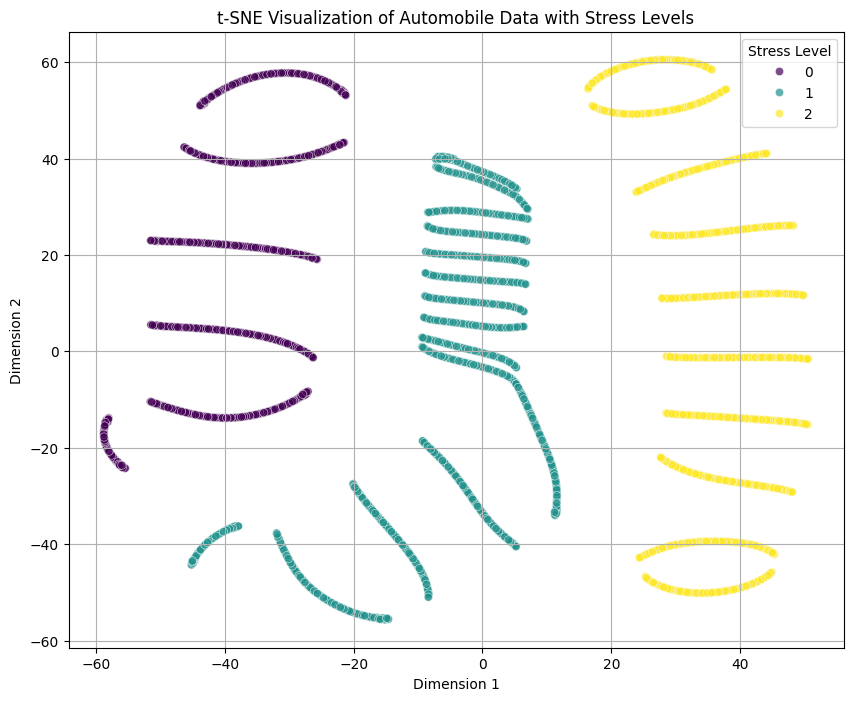

In [27]:
# Добавление столбца 'Stress Level' в tsne_df
tsne_df['Stress Level'] = sne_df['Stress Level']

# Построение графика с разными цветами для каждого уровня стресса
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Dimension 1", y="Dimension 2", hue="Stress Level", data=tsne_df, palette="viridis", alpha=0.7)
plt.title("t-SNE Visualization of Automobile Data with Stress Levels")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.legend(title="Stress Level")
plt.grid()
plt.show()


Алгоритм t-SNE попытался сохранить локальные связи между точками, что позволило разделить данные на несколько отдельных кластеров.

Это разделение может указывать на различия в данных, которые коррелируют с уровнем стресса. Например, данные с уровнем стресса 2 могут иметь общие характеристики, отличные от данных с уровнем стресса 0.

PCA:

Цель PCA — уменьшить размерность данных, сохраняя максимально возможную дисперсию. Он преобразует исходные данные в новый набор признаков (главных компонент), которые являются линейными комбинациями исходных признаков.
Подходит для обнаружения глобальных структур в данных, таких как основная тенденция, и для анализа важности признаков.
t-SNE:

t-SNE разработан для визуализации данных. Он фокусируется на сохранении локальных связей между точками, а не на глобальной структуре. То есть, алгоритм старается расположить близкие точки рядом, чтобы кластеры и группы были видимыми.
Подходит для выявления кластеров и локальных закономерностей в данных.

PCA лучше для линейных структур и глобальных зависимостей.
t-SNE лучше для выявления кластеров и локальных закономерностей.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
X = np.load('X.npy')
Y = np.load('Y.npy')

In [ ]:
X

array([[[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 ,
         0.5137255 , 0.5019608 ],
        [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 ,
         0.5176471 , 0.50980395],
        [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 ,
         0.5254902 , 0.5137255 ],
        ...,
        [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 ,
         0.54509807, 0.53333336],
        [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807,
         0.53333336, 0.52156866],
        [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 ,
         0.52156866, 0.50980395]],

       [[0.59607846, 0.60784316, 0.61960787, ..., 0.4627451 ,
         0.4509804 , 0.44313726],
        [0.60784316, 0.61960787, 0.6313726 , ..., 0.4745098 ,
         0.4627451 , 0.4509804 ],
        [0.6156863 , 0.627451  , 0.6431373 , ..., 0.4862745 ,
         0.4745098 , 0.4627451 ],
        ...,
        [0.50980395, 0.5176471 , 0.5254902 , ..., 0.40392157,
         0.39607844, 0.3882353 ],
        [0.5

In [ ]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

(-0.5, 63.5, 63.5, -0.5)

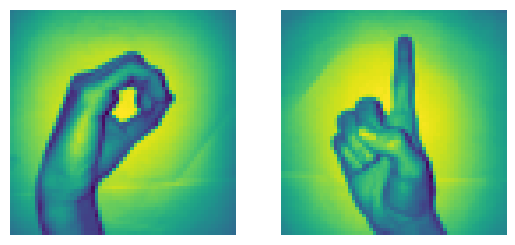

In [ ]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(X[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(X[900].reshape(img_size, img_size))
plt.axis('off')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# Check the number of samples in the training and test sets
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [ ]:
# Flatten the images for neural network input
# Assuming images are 64x64, so each image becomes a vector of 4096 pixels
X_train_flatten = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2]).T
X_test_flatten = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2]).T

In [ ]:
# Transpose labels to match model expectations
y_train = Y_train.T
y_test = Y_test.T

# Print the shapes to confirm
print("X train flatten:", X_train_flatten.shape)
print("X test flatten:", X_test_flatten.shape)
print("y train:", y_train.shape)
print("y test:", y_test.shape)

X train flatten: (4096, 1649)
X test flatten: (4096, 413)
y train: (10, 1649)
y test: (10, 413)


In [ ]:
# Model with ReLU in Dense Layers
def create_model_with_relu():
    model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_flatten.T.shape[1],)),  # Input layer
    Dense(64, activation='relu'),                                              # Hidden layer
    Dense(y_train.shape[0], activation='softmax')
    ])
    return model

# Model with Sigmoid in Dense Layers
def create_model_with_sigmoid():
    model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(X_train_flatten.T.shape[1],)),  # Input layer
    Dense(64, activation='sigmoid'),                                              # Hidden layer
    Dense(y_train.shape[0], activation='softmax')
    ])
    return model

# Model with Tanh in Dense Layers
def create_model_with_tanh():
    model = Sequential([
    Dense(128, activation='tanh', input_shape=(X_train_flatten.T.shape[1],)),  # Input layer
    Dense(64, activation='tanh'),                                              # Hidden layer
    Dense(y_train.shape[0], activation='softmax')
    ])
    return model

In [ ]:
# Compile the ReLU model
model_relu = create_model_with_relu()
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Compile the Sigmoid model
model_sigmoid = create_model_with_sigmoid()
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Compile the Tanh model
model_tanh = create_model_with_tanh()
model_tanh.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
val_generator = (X_test_flatten.T, y_test.T)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Training models with different activation functions (ReLU, Sigmoid, Tanh)

print("Starting training with ReLU activation...")
history_relu = model_relu.fit(X_train_flatten.T, y_train.T, epochs=20, validation_data=(X_test_flatten.T, y_test.T),
                              batch_size=32,callbacks=[early_stopping])

print("Starting training with Sigmoid activation...")
history_sigmoid = model_sigmoid.fit(X_train_flatten.T, y_train.T, epochs=20, validation_data=(X_test_flatten.T, y_test.T),
                                    batch_size=32)

print("Starting training with Tanh activation...")
history_tanh = model_tanh.fit(X_train_flatten.T, y_train.T, epochs=20, validation_data=(X_test_flatten.T, y_test.T),
                              batch_size=32)


Starting training with ReLU activation...
Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0891 - loss: 2.7761 - val_accuracy: 0.1695 - val_loss: 2.3384
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1667 - loss: 2.2704 - val_accuracy: 0.1743 - val_loss: 2.1913
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2239 - loss: 2.1543 - val_accuracy: 0.2203 - val_loss: 2.1098
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2515 - loss: 2.0394 - val_accuracy: 0.3535 - val_loss: 1.9152
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3284 - loss: 1.8775 - val_accuracy: 0.3729 - val_loss: 1.7350
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3920 - loss: 1.7024 - val_accuracy: 0.4334 - val_loss: 1.6586
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4497 - loss: 1.5775 - val_accuracy: 0.5109 - val_loss: 1.4268
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5293

In [ ]:
test_loss, test_accuracy = model_relu.evaluate(X_test_flatten.T, y_test.T)
print(f"Test accuracy: {test_accuracy:.2f}")

test_loss, test_accuracy = model_sigmoid.evaluate(X_test_flatten.T, y_test.T)
print(f"Test accuracy: {test_accuracy:.2f}")

test_loss, test_accuracy = model_tanh.evaluate(X_test_flatten.T, y_test.T)
print(f"Test accuracy: {test_accuracy:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.8816 
Test accuracy: 0.71
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4380 - loss: 1.5801 
Test accuracy: 0.45
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0755 - loss: 2.3175 
Test accuracy: 0.08


In [ ]:
# Step 6: Make Predictions
predictions = model_relu.predict(X_test_flatten.T)
predicted_classes = np.argmax(predictions, axis=0)
actual_classes = np.argmax(y_test.T, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
history_dict = {
    'ReLU': history_relu,
    'Sigmoid': history_sigmoid,
    'Tanh': history_tanh
}


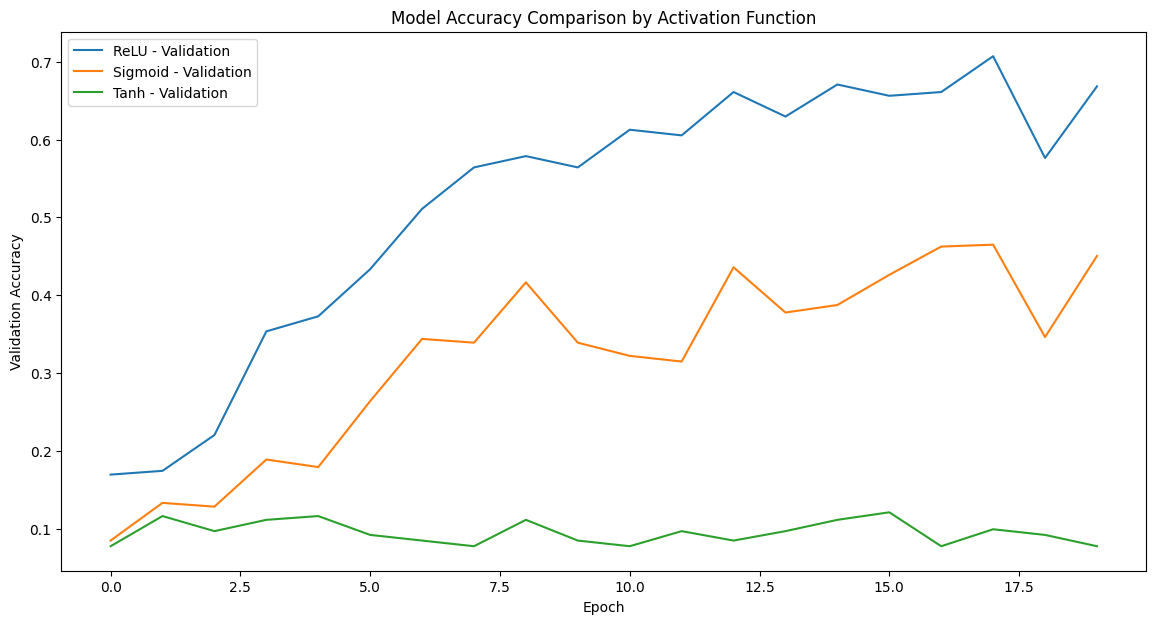

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(14, 7))

for activation in history_dict.keys():
    plt.plot(history_dict[activation].history['val_accuracy'], label=f"{activation} - Validation")

plt.title('Model Accuracy Comparison by Activation Function')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


In [ ]:
test_loss, test_accuracy = model_relu.evaluate(X_test_flatten.T, y_test.T)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7039 - loss: 0.8816 
Test Accuracy: 70.70%


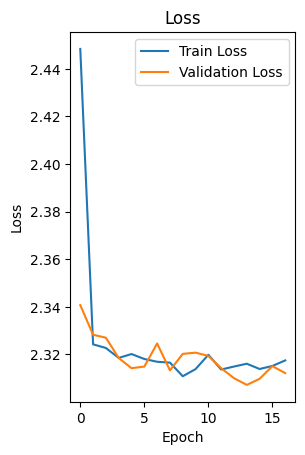

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

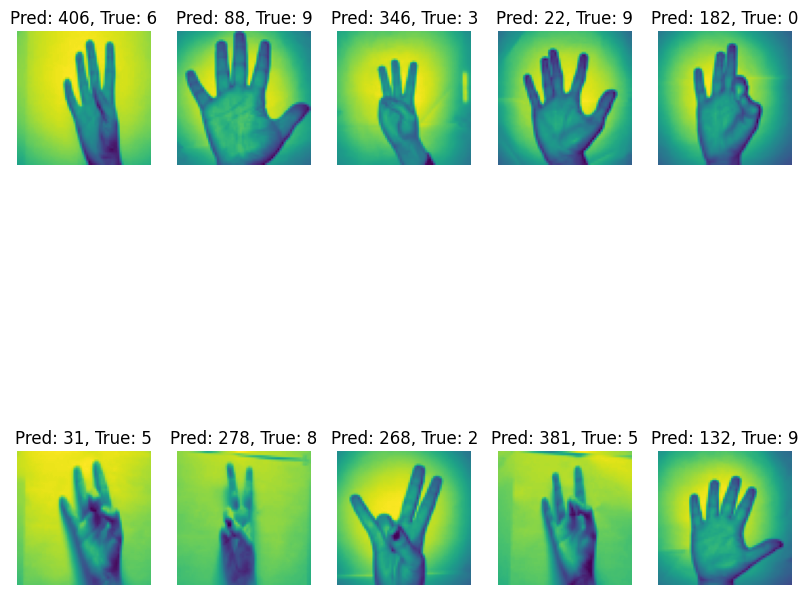

In [ ]:
# Step 8: Visualize Sample Predictions
# Display some images along with their predicted and true labels
img_size = 64
num_samples = 10
plt.figure(figsize=(10, 10))
for i in range(num_samples):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(img_size, img_size), cmap='viridis')
    plt.title(f"Pred: {predicted_classes[i]}, True: {actual_classes[i]}")
    plt.axis('off')
plt.show()

Градиентный спуск и минимизация функции потерь
Градиентный спуск — это итеративный алгоритм оптимизации, используемый для минимизации функции потерь в машинном обучении. Он работает следующим образом: на каждой итерации алгоритм вычисляет градиент функции потерь, который показывает направление и скорость наибольшего увеличения функции. Затем параметры модели обновляются в направлении, противоположном градиенту, с использованием небольшого шага, называемого скоростью обучения. Это позволяет постепенно снижать значение функции потерь, приближая модель к оптимальным параметрам.

Роль обратного распространения в обновлении весов нейронной сети
Обратное распространение — это алгоритм, используемый для обучения нейронных сетей, который помогает обновлять веса сети. Он начинается с вычисления ошибки на выходе сети (разницы между предсказанными и истинными значениями) и затем распространяет эту ошибку обратно через слои сети. Для каждого нейрона вычисляется градиент функции потерь относительно его веса. Эти градиенты используются для обновления весов в направлении, которое уменьшает ошибку, аналогично градиентному спуску. Таким образом, обратное распространение позволяет нейронной сети учиться на своих ошибках и улучшать точность предсказаний.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

def create_model(activation_function):
    model = Sequential([
        Dense(128, activation=activation_function, input_shape=(X_train_flatten.T.shape[1],)),
        Dense(64, activation=activation_function),
        Dense(y_train.shape[0], activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate Model with ReLU
model_relu = create_model('relu')
history_relu = model_relu.fit(X_train_flatten.T, y_train.T, epochs=20, validation_data=(X_test_flatten.T, y_test.T), batch_size=32, verbose=0)
test_loss_relu, test_accuracy_relu = model_relu.evaluate(X_test_flatten.T, y_test.T)

# Train and evaluate Model with Sigmoid
model_sigmoid = create_model('sigmoid')
history_sigmoid = model_sigmoid.fit(X_train_flatten.T, y_train.T, epochs=20, validation_data=(X_test_flatten.T, y_test.T), batch_size=32, verbose=0)
test_loss_sigmoid, test_accuracy_sigmoid = model_sigmoid.evaluate(X_test_flatten.T, y_test.T)

# Train and evaluate Model with Tanh
model_tanh = create_model('tanh')
history_tanh = model_tanh.fit(X_train_flatten.T, y_train.T, epochs=20, validation_data=(X_test_flatten.T, y_test.T), batch_size=32, verbose=0)
test_loss_tanh, test_accuracy_tanh = model_tanh.evaluate(X_test_flatten.T, y_test.T)

# Print the test accuracies for comparison
print(f"Test Accuracy with ReLU: {test_accuracy_relu:.4f}")
print(f"Test Accuracy with Sigmoid: {test_accuracy_sigmoid:.4f}")
print(f"Test Accuracy with Tanh: {test_accuracy_tanh:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7190 - loss: 0.8587 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2232 - loss: 1.9630 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0755 - loss: 2.3282
Test Accuracy with ReLU: 0.7167
Test Accuracy with Sigmoid: 0.2131
Test Accuracy with Tanh: 0.0775
